# Аналитика в авиакомпании
### В данном исследовании выявлены распределение рейсов по моделям самолётов и городам прибытия. <a class="tocSkip">
____
##### Проанализированны данные о рейсах по моделям за сентябрь 2018 и по городам прибытия за август 2018. <a class="tocSkip">

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-файлов-данных" data-toc-modified-id="Изучение-файлов-данных-1">Изучение файлов данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2">Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3">Общий вывод</a></span></li></ul></div>

## Изучение файлов данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

In [2]:
df1 = pd.read_csv('query_1.csv')
display(df1)
display(df1.info())
display(df1.duplicated().sum())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

0

Описание данных:
- model — модели самолетов;
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

Пропусков и дубликатов нет. Типы данных соответствуют задачам анализа.

In [3]:
df2 = pd.read_csv('query_3.csv')
display(df2.sample(10))
display(df2.info())
display(df2.duplicated().sum())

,city,average_flights
12,Владивосток,3.000
29,Киров,6.000
22,Ижевск,1.000
2,Анапа,2.161
67,Ростов-на-Дону,10.194
91,Хабаровск,6.548
64,Петрозаводск,5.871
14,Волгоград,5.129
73,Советский,9.000
77,Сургут,8.742


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

0

Описание данных:
- city — города;
- average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года.

Пропусков и дубликатов нет. Типы данных соответствуют задачам анализа.

### Вывод
В двух датасетах данные за 2018 год о количестве рейсов по моделям самолётов в сентябре и о среднем количестве рейсов по городам прибытия за день в августе. 

Данные без пропусков и дубликатов соответствующих задачам типов. Подготовки не требуют.

## Анализ данных

In [4]:
def create_barh(x, y, ylab, xlab, tit):
    height = len(x)
    fig, ax = plt.subplots(figsize=(12, height))
    ax.barh(x, y, align='center')
    plt.ylabel(ylab, fontsize=18)
    plt.xlabel(xlab, fontsize=18)
    plt.title(tit, fontsize=20)
    plt.grid(axis='x')
    for index, value in enumerate(y):
        plt.text(10, index, str(value), color='black', fontsize=14)
            
    plt.show()

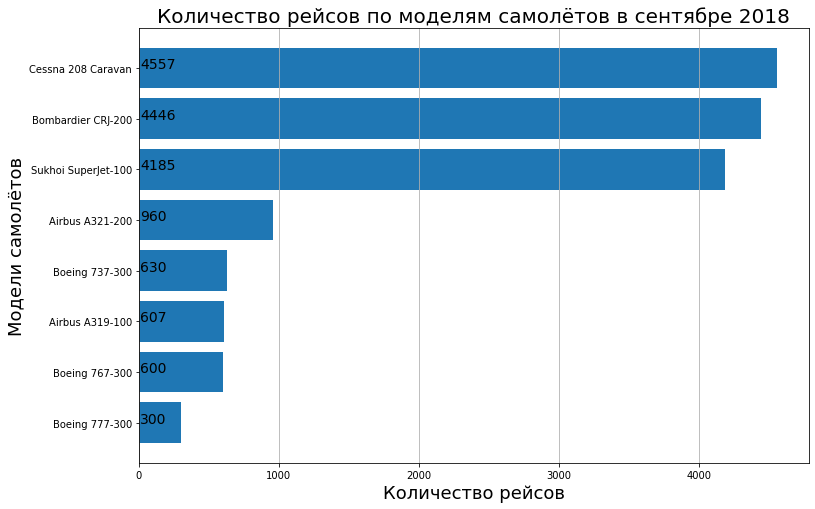

In [5]:
df1_sort = df1.sort_values(by='flights_amount')
create_barh(df1_sort['model'], df1_sort['flights_amount'], \
            'Модели самолётов', 'Количество рейсов', 'Количество рейсов по моделям самолётов в сентябре 2018')

- Больше всего рейсов (4557) выполнено на лёгких самолётах модели Cessna 208 Caravan, способной перевезти до 13 пассажиров на расстояние до 1800 км.    
- Совсем немного в масштабах исследования отстают (4446) региональные Bombardier CRJ-200 (50 человек, 3713 км).
- Среди ближнемагистральных лидируют (4185) Sukhoi SuperJet-100 (98 человек, 4578 км), а Boeing 737-300 (149 человек, 4176 км) отстаёт (630) от него почти в семь раз.
- Среднемагистральные перевозки распределились между (960) Airbus A321-200 (220 человек, 5950 км) и (607) Airbus A319-100 (156 человек, 6850 км).
- Дальнемагистральные перелёты в два раза чаще выполняются (600) на Boeing 767-300 (350 человек, 11305 км), чем на (300) Boeing 777-300 (451 человек, 10190 км).

**Распределение количества рейсов по моделям соотносится с ориентацией авиакомпании на внутренний рынок.**

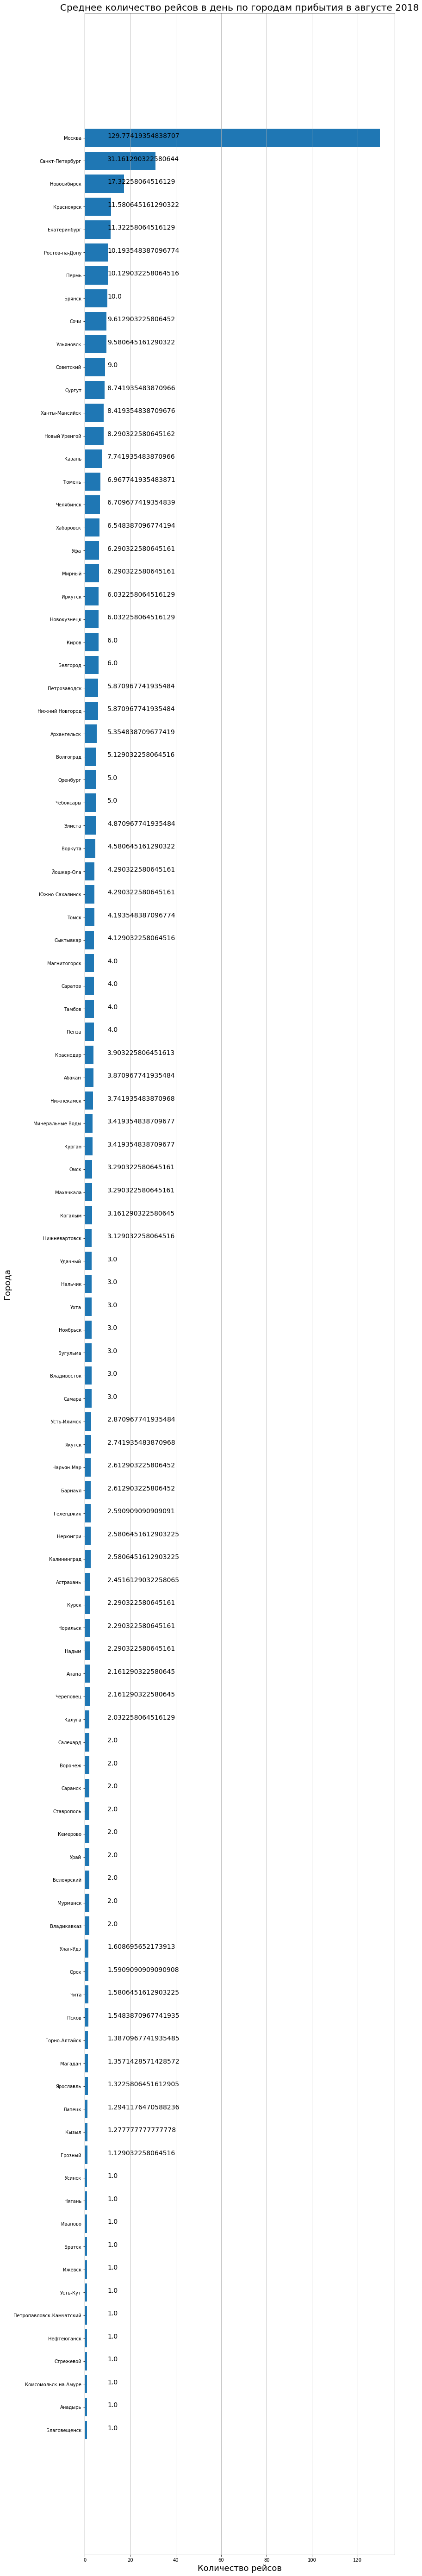

In [6]:
df2_sort = df2.sort_values(by='average_flights')
create_barh(df2_sort['city'], df2_sort['average_flights'], \
            'Города', 'Количество рейсов', 'Среднее количество рейсов в день по городам прибытия в августе 2018')

- Лидирует, конечно же, Москва с кратным отрывом от идущего вторым Санкт-Петербурга. В этом результате стоит учесть, что при более глубоком анализе можно будет обнаружить большое число транзитных рейсов через Москву.
- За ними следуют крупнейшие города федеральных округов.
- Стабильные ежедневные рейсы в отдалённые и малые города снова говорят об ориентации авиакомпании на внутренний рынок.
- **Топ-10 городов прибытия по среднему количеству рейсов в день в августе 2018:**
    - Москва
    - Санкт-Петербург
    - Новосибирск
    - Красноярск
    - Екатеринбург
    - Ростов-на-Дону
    - Пермь
    - Брянск
    - Сочи
    - Ульяновск

### Вывод
Поверхностный вывод о большом количестве регулярных рейсов на Цеснах в Москву забавен и демонстрирует предварительный характер проведённого исследования.
Изучение количества рейсов в разбивке по моделям самолётов и городам прибытия позволяет лишь подтвердить ориентацию компании на внутренние рейсы.

## Общий вывод
- Исследование связи проведения музыкальных фестивалей и спроса на авиабилеты носит подготовительных характер.
- В ходе работы с запросами к базе обратил внимание на низкую информативность выборки по Москве. Куда сильнее, предполагаю, связь проявится в других городах.
- Так же количество рейсов считаю менее информативной метрикой, чем количество билетов.
- Стоит так же учесть, что посетитель фестиваля может прилететь заранее, по различным причинам, которые тоже можно изучить.